### Employee performance analysis

We would like to analyze the performance of employees in FAU Bank using the data set  provided in the file `FAU_Bank_Employee_Performance.xls`.

#### Import the neccessary libraries

We are going to need pandas and numpy libraries to read the data and perform some basic operations on it.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Import dataset

In [2]:
df = pd.read_excel("FAU_Bank_Employee_Performance.xls")

#### Data cleaning

Checking for missing values


In [3]:
df.isnull().values.any()

False

We don't have any missing values in the dataset. We can now proceed to the next step.

#### Dataset summary

Receive a summary of the columns in the dataset.

In [4]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

Let's take a look at the first rows of the dataset to get some understanding of how it looks like.

In [5]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Business,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


"describe" function helps us to receive a statistical summary of the dataset.

In [6]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


### Visualizing the performance of employees in the bank as per department.

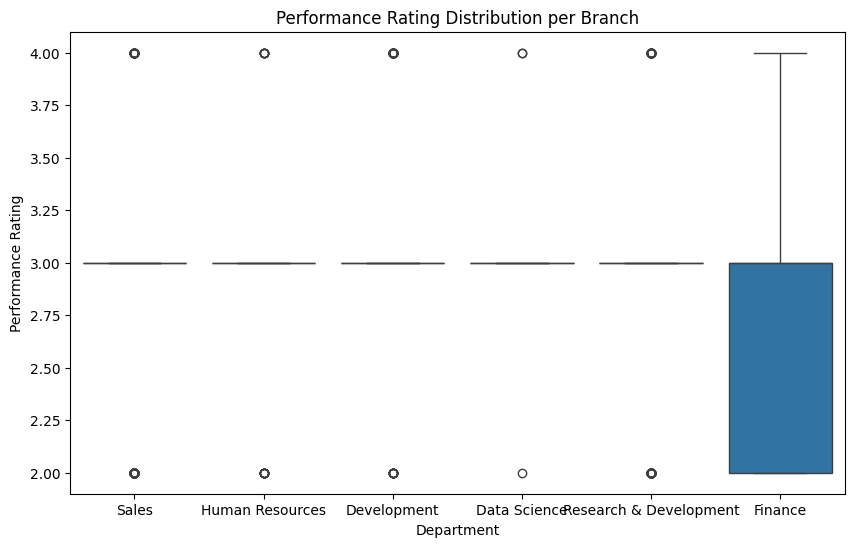

In [7]:
# For Performance Distribution per Branch
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.boxplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.title('Performance Rating Distribution per Branch')
plt.xlabel('Department')
plt.ylabel('Performance Rating')
plt.show()

C:\Users\prabh\AppData\Local\Temp\ipykernel_20876\2694770321.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PerformanceRating'], hist=True, kde=False,


Text(0, 0.5, 'number of employees')

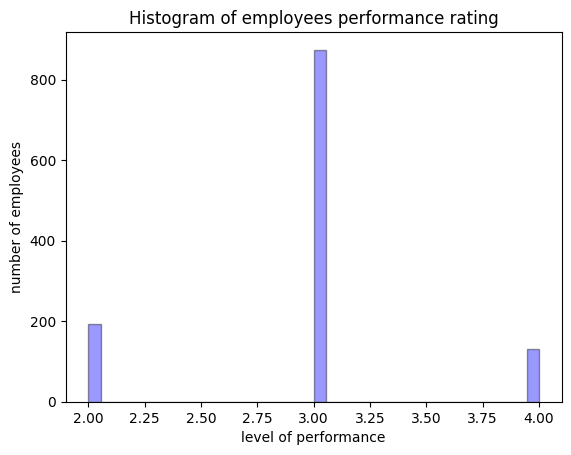

In [8]:
sns.distplot(df['PerformanceRating'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of employees performance rating')
plt.xlabel('level of performance')
plt.ylabel('number of employees')

We can observe a normal distribution here.

### Converting categorical variables to numerical variables

In [9]:
# change the categorical columns to numerical
category_columns = ['EducationBackground', 'MaritalStatus', 'EmpJobRole', 'EmpDepartment',
                   'BusinessTravelFrequency', 'OverTime', 'Attrition']
# Initialize a dictionary to store label encodings
label_encodings = {}

# Encode categorical columns and store mappings
for column in category_columns:
    label = LabelEncoder()
    df[column] = label.fit_transform(df[column])
    # Store the mapping for this column
    label_encodings[column] = {index: label for index, label in enumerate(label.classes_)}

### Drop few columns

Removing the columns empNumber because it does not have any impact on the performance of the employees.
Also removing age and gender columns as we would like to remove the bias from the model.

In [10]:
columns_to_drop = ['EmpNumber', 'Age', 'Gender']

# Drop unnecessary columns
df = df.drop(columns_to_drop, axis=1)

### Draw a heatmap to see the correlation between the variables.

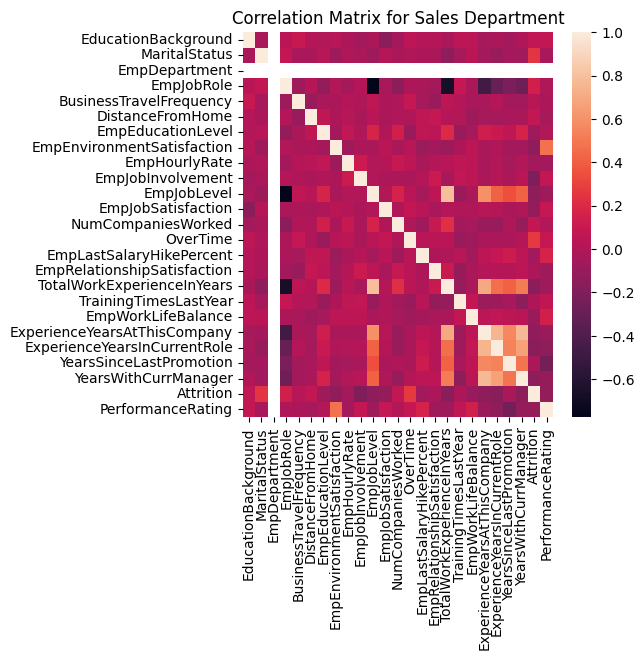

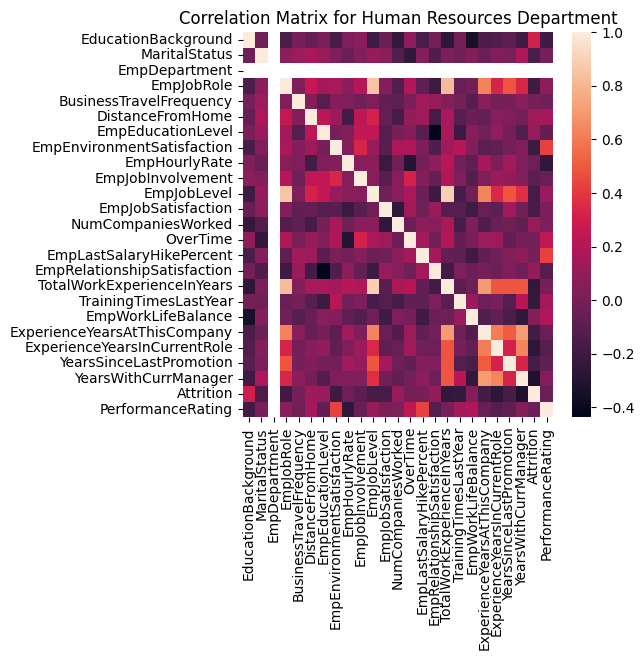

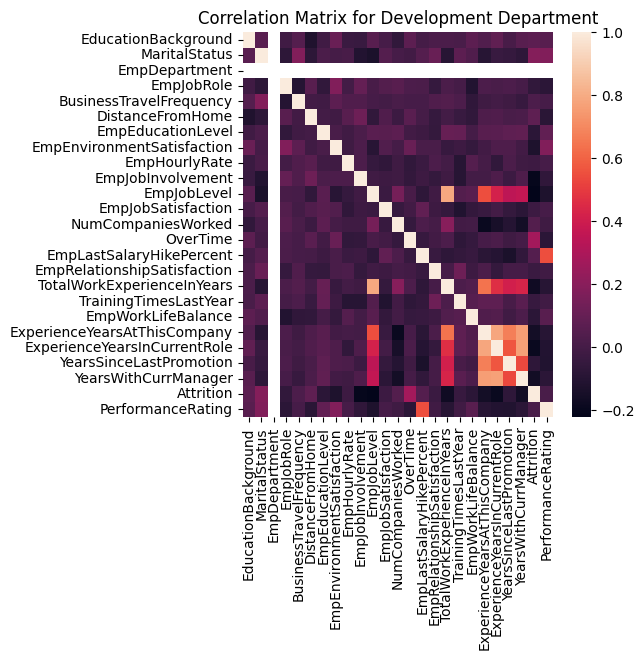

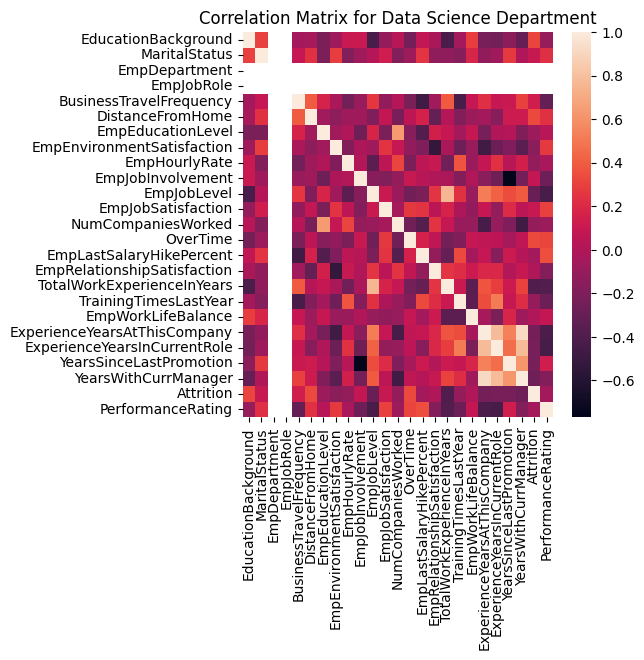

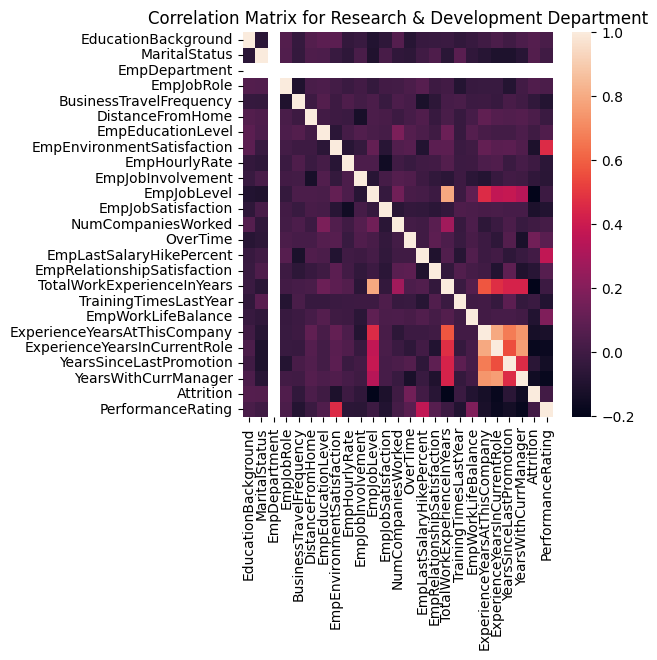

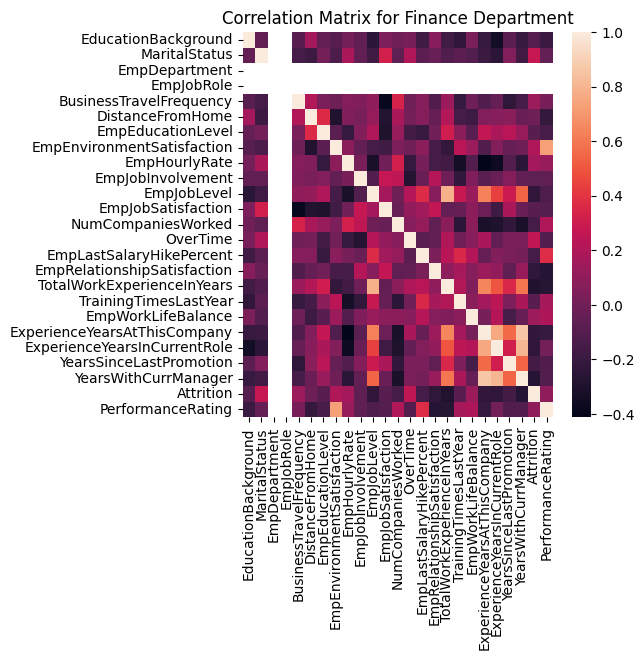

In [11]:
decoded_departments = label_encodings['EmpDepartment']
# Iterate through each department
for department in df['EmpDepartment'].unique():
    # Filter the DataFrame for the current department
    df_dept = df[df['EmpDepartment'] == department]
    
    # Compute the correlation matrix
    corr = df_dept.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
    plt.title(f'Correlation Matrix for {decoded_departments[department]} Department')
    plt.show()

From the correlation matrices it is clear that there is a very high correlation between the variables.
Columns like "EmpEnvironmentSatisfaction", "EmpLastSalaryHikePercent", "EmpWorkLifeBalance", "ExperienceYearsAtThisCompany", "ExperienceYearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager" have a high correlation with the target variable "PerformanceRating".

### Now it is time to define and train the ML model 

In our case the dependent variable would be the performance and all of the other variables would be independent. Now we can analyze the influence of the independent variables to the dependent one.

We will use the Random Forest Classifier to predict the performance of the employees.

only the columns with the highest correlation with the target variable will be used which are "EmpEnvironmentSatisfaction", "EmpLastSalaryHikePercent", "EmpWorkLifeBalance".

In [12]:
important_columns = ['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance']

x = df[important_columns]
y = df['PerformanceRating']


#### Split the dataset in training set and test set

Split the dataset into the training set and test set so that we can firstly train our model and then test how it works. 
We set the test size to be 30% so training set would 70%.

To do that we would need the "train_test_split" function from sklearn.model_selection. So let's import the function and split the dataset.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#### Train the model on the training set

Now we train the model using the LinearRegression function.

In [14]:
from sklearn.ensemble import RandomForestClassifier 
ml = RandomForestClassifier()
ml.fit(x_train, y_train)

RandomForestClassifier()

#### Test the model

To make sure that our model works and is capable of predicting values, we could predict the performance of an employee. 
Let's take as an example the values from the first raw of our dataset and predict the performance of this employee using the trained model.

We can then compare the predicted value with the real value, to check how well the model is performing.

In [15]:
x.head()

,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance
0,4,12,2
1,4,12,3
2,4,21,3
3,2,15,2
4,1,14,3


In [16]:
y_pred = ml.predict(x_test)
predicted_value = ml.predict([[4, 12, 2]])
actual_value = df.loc[0,'PerformanceRating']

print(predicted_value, actual_value)

[3] 3


c:\Users\prabh\FAU\Study\SoSe2024\PA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Evaluate the model


#### Actual and Predicted values for the first 20 employee records

Let's now see the actual and the predicted values as well as the difference between them for the first 5 employee records.

In [17]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:5]

,Actual Value,Predicted value,Difference
198,3,3,0
328,3,3,0
45,3,3,0
263,3,3,0
621,3,2,1


We see that the model is pretty accurate as the differences are small. 

#### Model evaluation


In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


0.7933333333333333
[[ 15  25   2]
 [ 26 193   4]
 [  1   4  30]]
              precision    recall  f1-score   support

           2       0.36      0.36      0.36        42
           3       0.87      0.87      0.87       223
           4       0.83      0.86      0.85        35

    accuracy                           0.79       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.79      0.79      0.79       300

